![Python](https://img.shields.io/badge/python-3.9-blue)
![Status: Pending Migration](https://img.shields.io/badge/status-pending%20migration-orange)

<a id="table-of-contents"></a>
# 📖 Table of Contents

[🧭 Objective](#objective)  
- [🧠 What is Clustering?](#what-is-clustering)  
- [📌 When is Clustering Useful?](#clustering-use-cases)  
- [📏 Evaluation Challenges](#evaluation-challenges)

[📦 Data Setup](#data-setup)  
- [📥 Load Dataset](#load-dataset)  
- [🧹 Preprocessing](#preprocessing)

[📊 Clustering Algorithms](#clustering-algos)

[📈 KMeans](#kmeans)  
- [⚙️ Core Logic](#kmeans-logic)  
- [📉 Elbow + Silhouette Method](#kmeans-eval)  
- [📊 Visual Output](#kmeans-visuals)

[🧱 Hierarchical Clustering](#hierarchical)  
- [🌳 Dendrograms](#dendrograms)  
- [📏 Linkage Types](#linkage)  
- [📊 Cluster Cuts](#cluster-cuts)

[🌐 DBSCAN](#dbscan)  
- [🔍 Intuition](#dbscan-intuition)  
- [⚙️ Epsilon, MinPts](#dbscan-params)  
- [📊 Visual Output](#dbscan-visuals)

[🎲 Gaussian Mixture Models (GMM)](#gmm)  
- [🧠 Soft Clustering](#soft-clustering)  
- [📈 BIC / AIC for Model Selection](#gmm-eval)

[📍 Mean Shift](#meanshift)  
- [📏 Bandwidth Selection](#bandwidth)

[🎼 Spectral Clustering](#spectral)  
- [🔗 Graph Representation](#spectral-graph)  
- [📊 Laplacian & Eigenvectors](#spectral-laplacian)

[📡 OPTICS](#optics)  
- [🪜 Reachability Plot](#reachability)

[🌲 BIRCH](#birch)

[🔥 HDBSCAN](#hdbscan)

[🧬 Other Methods](#other-methods)  
- [🧿 Affinity Propagation](#affinity-prop)  
- [🧊 Ward’s Method](#ward)

[📌 Summary Table](#summary-table)  
- [📋 Comparison Across Methods](#method-comparison)  
- [🧭 Practical Recommendations](#recommendations)

[❓ FAQ / Notes](#faq)  
- [📏 Choosing Number of Clusters](#choose-k)  
- [📊 Distance Metrics](#distance-metrics)  
- [⚠️ Common Pitfalls](#pitfalls)

___

<a id="objective"></a>
# 🧭 Objective

<a id="what-is-clustering"></a>
#### 🧠 What is Clustering?

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🧠 What is Clustering?

Clustering is an unsupervised learning technique that groups similar data points together without predefined labels.

- The goal is to **identify natural groupings** in data based on similarity or distance
- Each group is called a **cluster**, and the points within a cluster are more similar to each other than to points in other clusters
- Used to uncover structure in data when no labels are available

##### Types of Clustering

- **Hard Clustering**: Each point belongs to one cluster (e.g., KMeans)
- **Soft Clustering**: Points can belong to multiple clusters with probabilities (e.g., GMM)
- **Hierarchical Clustering**: Builds a tree-like structure of nested clusters
- **Density-Based Clustering**: Forms clusters based on dense regions (e.g., DBSCAN)

</details>


<a id="clustering-use-cases"></a>
#### 📌 When is Clustering Useful?

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 📌 When is Clustering Useful?

Clustering is helpful when you want to discover structure or patterns in unlabeled data.

##### Common Applications

- **Customer Segmentation**: Group users based on behavior or demographics
- **Market Research**: Identify distinct buyer personas
- **Anomaly Detection**: Spot outliers as points that don’t belong to any cluster
- **Recommender Systems**: Group similar items or users
- **Document Clustering**: Group similar news articles, reports, etc.
- **Genetics & Bioinformatics**: Group similar gene expressions or cell types

##### Key Benefit

Clustering helps reduce complexity by summarizing large datasets into **meaningful groups**, even when labels are unavailable.

</details>


<a id="evaluation-challenges"></a>
#### 📏 Evaluation Challenges

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 📏 Evaluation Challenges

Clustering is difficult to evaluate because it’s unsupervised — there’s no ground truth.

##### Internal Evaluation

- **Silhouette Score**: Measures how well a point fits within its cluster vs. others
- **Davies-Bouldin Index**: Lower values = better cluster separation
- **Calinski-Harabasz Index**: Ratio of between- to within-cluster dispersion

##### External Evaluation (when ground truth is available)

- **Adjusted Rand Index (ARI)**: Measures similarity to true labels
- **Normalized Mutual Information (NMI)**: Captures mutual information between assignments and labels

##### Other Challenges

- **Choosing the Number of Clusters** (K)
- **Handling High-Dimensionality**: PCA/t-SNE often needed
- **Scale Sensitivity**: Many algorithms need feature normalization
- **Irregular Cluster Shapes**: Some methods fail on non-spherical clusters

</details>


[Back to the top](#table-of-contents)
___



<a id="data-setup"></a>
# 📦 Data Setup

<a id="load-dataset"></a>
#### 📥 Load Dataset

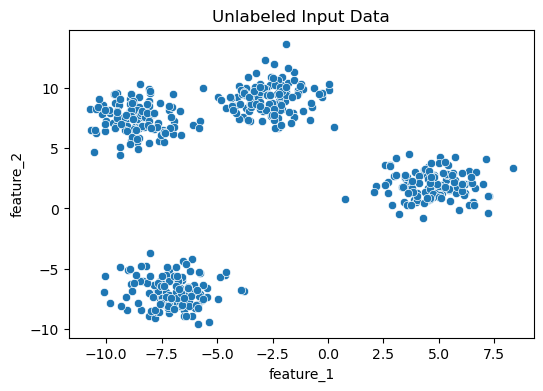

In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic clusterable data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)
df = pd.DataFrame(X, columns=["feature_1", "feature_2"])

# Plot raw input
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="feature_1", y="feature_2")
plt.title("Unlabeled Input Data")
plt.show()

<a id="preprocessing"></a>
#### 🧹 Preprocessing

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🧹 Preprocessing

Clustering algorithms like KMeans, DBSCAN, and GMM are sensitive to feature scale.

- We apply **StandardScaler** to normalize all features to zero mean and unit variance
- This ensures that distance-based calculations treat each feature equally
- Additional steps like missing value imputation or encoding are skipped here as all features are numeric and clean

</details>


In [4]:
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Preview
df_scaled.head()


,feature_1,feature_2
0,-0.766161,0.562117
1,-1.266310,-1.545187
2,2.006315,-0.297524
3,0.077145,0.684294
4,-0.385682,-1.611826


[Back to the top](#table-of-contents)
___



<a id="clustering-algos"></a>
# 📊 Clustering Algorithms

##### 📊 Comparison

| Algorithm           | Works Well For               | Assumes Shape       | Needs Scaling | Handles Outliers | Notes |
|---------------------|------------------------------|----------------------|---------------|------------------|-------|
| **KMeans**          | Spherical, equal-size blobs  | Spherical            | ✅ Yes         | ❌ No             | Fast, interpretable |
| **Hierarchical**    | Any size, low dims           | Flexible (linkage)   | 🟡 Sometimes   | ❌ No             | Good for visualizing nested groups |
| **DBSCAN**          | Irregular, density-based     | Arbitrary            | ✅ Yes         | ✅ Yes            | Needs `eps` tuning |
| **GMM**             | Elliptical, probabilistic    | Gaussian blobs       | ✅ Yes         | ❌ No             | Soft assignments |
| **Mean Shift**      | Smooth cluster shapes        | Arbitrary            | ✅ Yes         | ❌ No             | Bandwidth sensitive |
| **Spectral**        | Graph-connected data         | Graph-based          | ✅ Yes         | ❌ No             | Slow for large N |
| **OPTICS**          | Nested, variable density     | Arbitrary            | 🟡 Sometimes   | ✅ Yes            | Better than DBSCAN for chaining |
| **BIRCH**           | Large data, streaming        | Spherical-ish        | 🟡 Sometimes   | ❌ No             | Memory-efficient |
| **HDBSCAN**         | Hierarchical + density       | Arbitrary            | 🟡 Sometimes   | ✅ Yes            | Adaptive to density |
| **Affinity Prop.**  | Message-passing structure    | N/A (similarity)     | ✅ Yes         | ❌ No             | No need to set K |

##### 🖼️ Visual Comparison

This image from scikit-learn shows how different algorithms behave on varied shapes and densities:
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" alt="clustering comparison" width="900"/>

[Back to the top](#table-of-contents)
___



<a id="kmeans"></a>
# 📈 KMeans

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 📈 What is KMeans?

KMeans is a **partitioning-based clustering algorithm** that groups data into `K` clusters by minimizing the **sum of squared distances (inertia)** within clusters.

##### ⚙️ How It Works

1. **Initialize** `K` centroids (randomly or via KMeans++)  
2. **Assign** each point to the nearest centroid  
3. **Update** centroids as the mean of all assigned points  
4. **Repeat** steps 2–3 until convergence

##### ✅ When to Use

- Clusters are **compact, well-separated**, and roughly spherical
- **Scalability** matters — KMeans is fast and efficient
- Applications like customer segmentation, image compression, etc.

##### ⚠️ Limitations

- Requires choosing `K` in advance  
- Sensitive to **initial centroids**, **outliers**, and **feature scaling**  
- Assumes clusters are **convex and isotropic**

##### 🧠 Variants

- **KMeans++**: Better centroid initialization  
- **MiniBatch KMeans**: Faster for large datasets  
- **Fuzzy C-Means**: Soft assignment to multiple clusters

</details>


<a id="kmeans-logic"></a>
#### ⚙️ Core Logic

<a id="kmeans-eval"></a>
#### 📉 Elbow + Silhouette Method

<a id="kmeans-visuals"></a>
#### 📊 Visual Output

[Back to the top](#table-of-contents)
___



<a id="hierarchical"></a>
# 🧱 Hierarchical Clustering

<a id="dendrograms"></a>
#### 🌳 Dendrograms

<a id="linkage"></a>
#### 📏 Linkage Types

<a id="cluster-cuts"></a>
#### 📊 Cluster Cuts

[Back to the top](#table-of-contents)
___



<a id="dbscan"></a>
# 🌐 DBSCAN

<a id="dbscan-intuition"></a>
#### 🔍 Intuition

<a id="dbscan-params"></a>
#### ⚙️ Epsilon, MinPts

<a id="dbscan-visuals"></a>
#### 📊 Visual Output

[Back to the top](#table-of-contents)
___



<a id="gmm"></a>
# 🎲 Gaussian Mixture Models (GMM)

<a id="soft-clustering"></a>
#### 🧠 Soft Clustering

<a id="gmm-eval"></a>
#### 📈 BIC / AIC for Model Selection

[Back to the top](#table-of-contents)
___



<a id="meanshift"></a>
# 📍 Mean Shift

<a id="bandwidth"></a>
#### 📏 Bandwidth Selection

[Back to the top](#table-of-contents)
___



<a id="spectral"></a>
# 🎼 Spectral Clustering

<a id="spectral-graph"></a>
#### 🔗 Graph Representation

<a id="spectral-laplacian"></a>
#### 📊 Laplacian & Eigenvectors

[Back to the top](#table-of-contents)
___



<a id="optics"></a>
# 📡 OPTICS

<a id="reachability"></a>
#### 🪜 Reachability Plot

[Back to the top](#table-of-contents)
___



<a id="birch"></a>
# 🌲 BIRCH

[Back to the top](#table-of-contents)
___



<a id="hdbscan"></a>
# 🔥 HDBSCAN

[Back to the top](#table-of-contents)
___



<a id="other-methods"></a>
# 🧬 Other Methods

<a id="affinity-prop"></a>
#### 🧿 Affinity Propagation

<a id="ward"></a>
#### 🧊 Ward’s Method

[Back to the top](#table-of-contents)
___



<a id="summary-table"></a>
# 📌 Summary Table

<a id="method-comparison"></a>
#### 📋 Comparison Across Methods

<a id="recommendations"></a>
#### 🧭 Practical Recommendations

[Back to the top](#table-of-contents)
___



<a id="faq"></a>
# ❓ FAQ / Notes

<a id="choose-k"></a>
#### 📏 Choosing Number of Clusters

<a id="distance-metrics"></a>
#### 📊 Distance Metrics

<a id="pitfalls"></a>
#### ⚠️ Common Pitfalls

[Back to the top](#table-of-contents)
___

